#### **Model Training**

In [2]:
import pandas as pd
data = pd.read_csv("C:\\Users\\kketa\\OneDrive\\Desktop\\ANN\\saved_model\\dataset\\Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
### No missing values present in the data
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.drop(labels=['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
## Check for duplicated records
data.duplicated().sum()

0

In [7]:
## Independent and dependent features
X = data.drop(labels=['Exited'],axis=1)
Y = data[['Exited']]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
# Segregating numerical and categorical variables
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: Index(['Geography', 'Gender'], dtype='object')
Numerical Columns: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [10]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
gender_categories = ['Male', 'Female']
geo_categories = ['Germany', 'Spain', 'France']

In [13]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [14]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

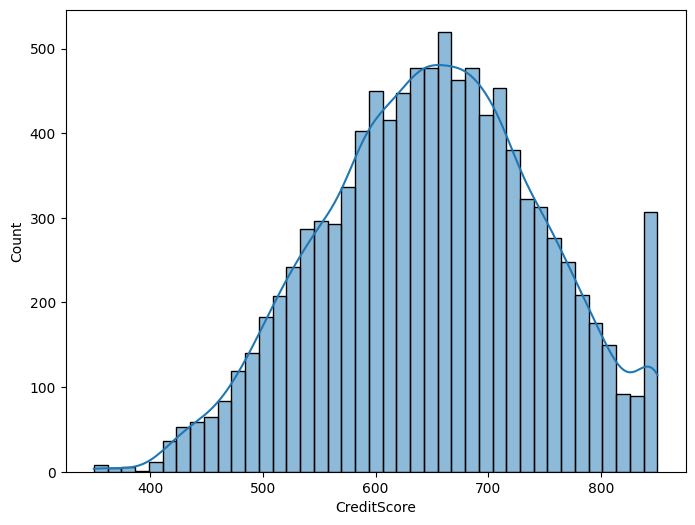

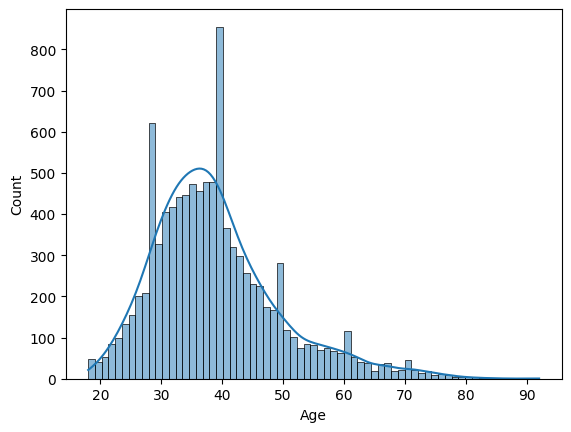

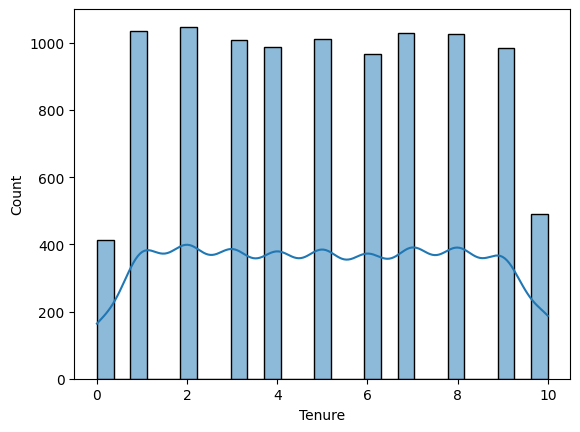

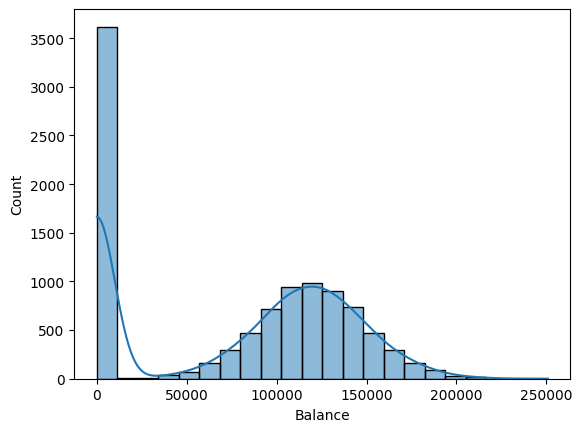

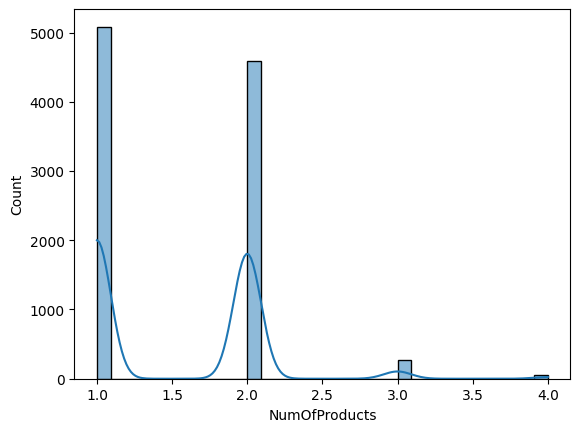

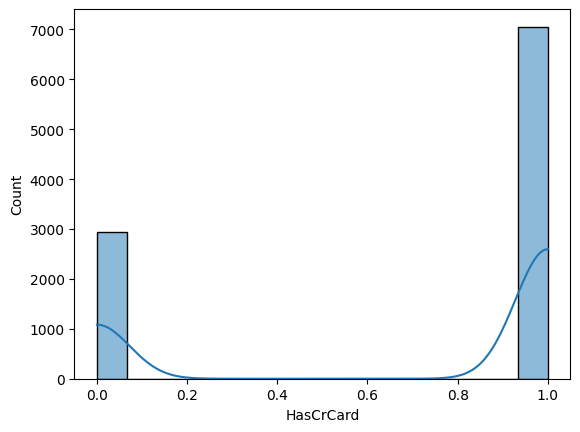

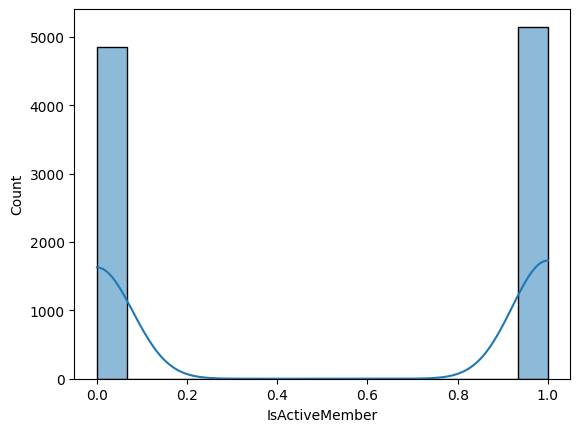

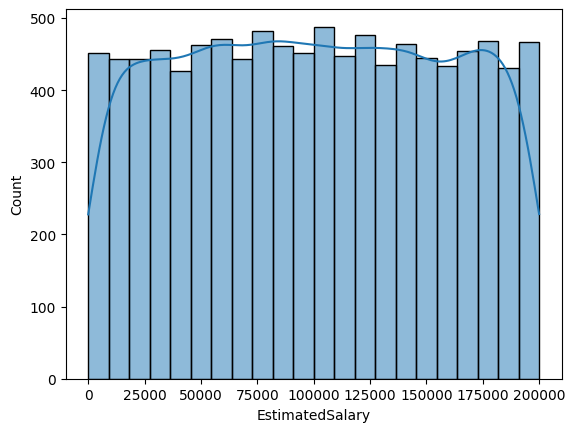

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_cols:
    sns.histplot(data=data,x=i,kde=True)
    print('\n')
    plt.show()

<Figure size 800x600 with 0 Axes>

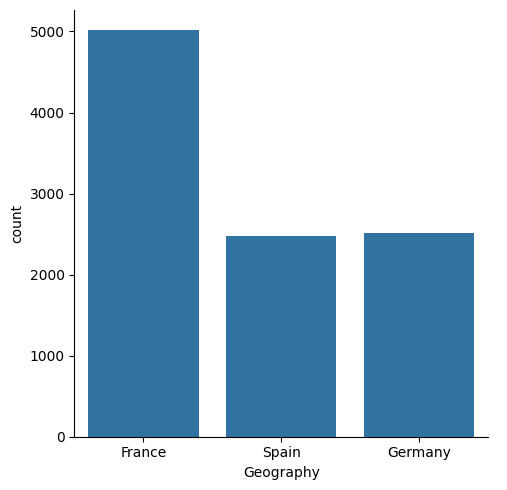

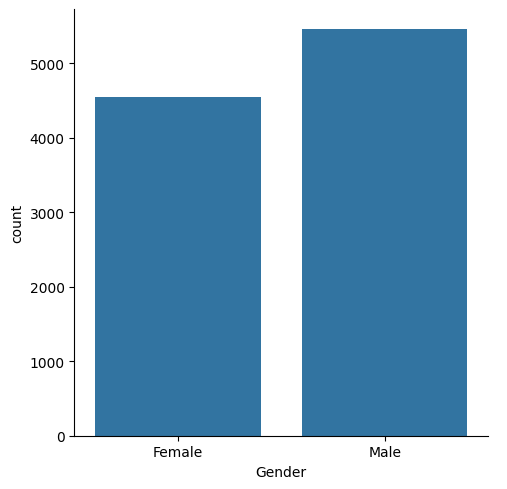

In [16]:
## Do the same for categorical data

plt.figure(figsize=(8,6))
x=0
for i in categorical_cols:
    sns.catplot(data=data,x=i,kind='count')
    print('\n')
    plt.show()

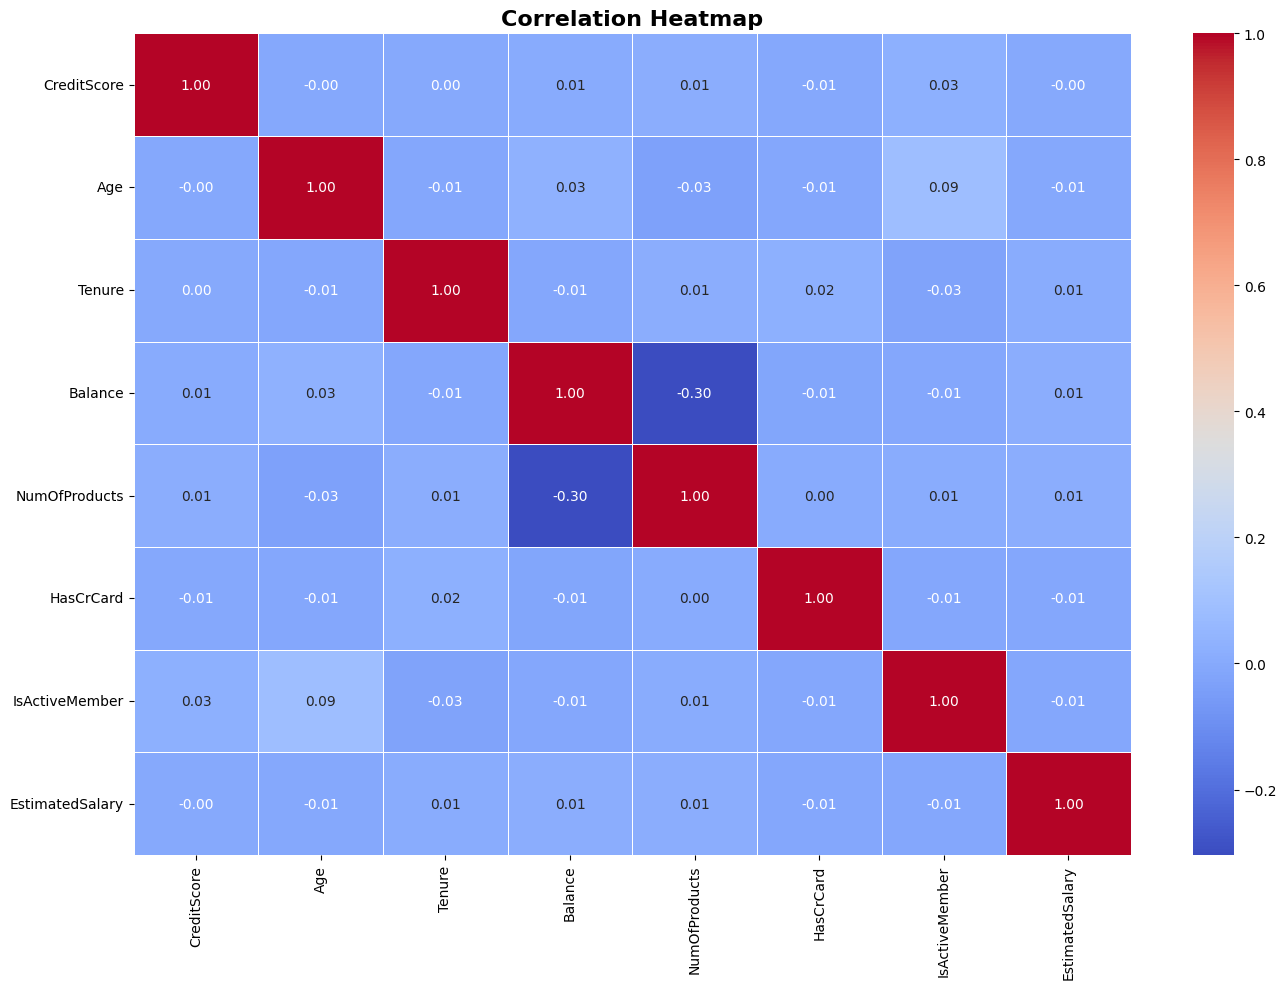

In [17]:
## Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
corr_matrix = data[numerical_cols].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"size": 10}
)

plt.title("Correlation Heatmap", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

In [18]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [20]:
## Numerical Pipeline
num_pipeline = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                             ('scaler',StandardScaler())]
                        )

# Categorigal Pipeline
cat_pipeline = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                               ('ordinalencoder',OrdinalEncoder(categories=[geo_categories, gender_categories])),
                               ('scaler',StandardScaler())]
                        )

preprocessor = ColumnTransformer([('num_pipeline',num_pipeline,numerical_cols),
                                ('cat_pipeline',cat_pipeline,categorical_cols)
                            ])

In [21]:
## Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [22]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [23]:
X_train.head()

,num_pipeline__CreditScore,num_pipeline__Age,num_pipeline__Tenure,num_pipeline__Balance,num_pipeline__NumOfProducts,num_pipeline__HasCrCard,num_pipeline__IsActiveMember,num_pipeline__EstimatedSalary,cat_pipeline__Geography,cat_pipeline__Gender
0,-0.344595,-0.656750,-0.342170,1.583725,0.819663,0.645981,0.970714,1.248214,-0.304209,1.098232
1,-0.095181,-0.466380,0.698162,1.344106,-0.903352,-1.548034,0.970714,1.521225,-1.511387,1.098232
2,-0.947345,-0.561565,0.351385,-1.222055,0.819663,-1.548034,-1.030169,1.263615,0.902969,-0.910554
3,-0.354987,0.199916,1.044940,-0.618965,-0.903352,0.645981,0.970714,1.646839,-1.511387,-0.910554
4,0.642668,-0.180824,1.391718,1.152808,0.819663,-1.548034,0.970714,0.875112,0.902969,-0.910554


In [24]:
X_test.head()

,num_pipeline__CreditScore,num_pipeline__Age,num_pipeline__Tenure,num_pipeline__Balance,num_pipeline__NumOfProducts,num_pipeline__HasCrCard,num_pipeline__IsActiveMember,num_pipeline__EstimatedSalary,cat_pipeline__Geography,cat_pipeline__Gender
0,-0.583617,-0.656750,-0.688948,0.324894,0.819663,-1.548034,-1.030169,-1.023964,-1.511387,-0.910554
1,-0.303026,0.390286,-1.382503,-1.222055,0.819663,0.645981,0.970714,0.790096,0.902969,-0.910554
2,-0.531655,0.485471,-0.342170,-1.222055,0.819663,0.645981,-1.030169,-0.733048,-0.304209,1.098232
3,-1.518919,1.913248,1.044940,0.683891,0.819663,0.645981,0.970714,1.211571,-1.511387,-0.910554
4,-0.957737,-1.132675,0.698162,0.777369,-0.903352,0.645981,0.970714,0.240116,-0.304209,1.098232


In [25]:
import pickle

with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)

#### **ANN IMPLEMENTATION**

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [27]:
(X_train.shape[1], )

(10,)

In [28]:
# dropout layer to prevent overfitting
from tensorflow.keras.layers import Dropout

In [29]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    # Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [32]:
## compile model with Recall & Precision
model.compile(
    optimizer=opt,
    loss="binary_crossentropy",
    metrics=[
        'accuracy',
        # tf.keras.metrics.Recall(name='recall'),
        # tf.keras.metrics.Precision(name='precision')
    ]
)

In [33]:
## TensorBoard setup
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [34]:
## Early Stopping
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [35]:
### Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    callbacks=[tensorflow_callback, early_stopping_callback]
)

Epoch 1/200


219/219 [==============================] - 1s 3ms/step - loss: 0.4828 - accuracy: 0.7794 - val_loss: 0.3973 - val_accuracy: 0.8323
Epoch 2/200
219/219 [==============================] - 0s 1ms/step - loss: 0.3922 - accuracy: 0.8374 - val_loss: 0.3600 - val_accuracy: 0.8603
Epoch 3/200
219/219 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.8511 - val_loss: 0.3447 - val_accuracy: 0.8630
Epoch 4/200
219/219 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.8541 - val_loss: 0.3399 - val_accuracy: 0.8623
Epoch 5/200
219/219 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.8554 - val_loss: 0.3417 - val_accuracy: 0.8633
Epoch 6/200
219/219 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8570 - val_loss: 0.3371 - val_accuracy: 0.8637
Epoch 7/200
219/219 [==============================] - 0s 2ms/step - loss: 0.3405 - accuracy: 0.8593 - val_loss: 0.3389 - val_accuracy: 0.86

In [36]:
model.save('model.h5')

c:\Users\kketa\anaconda3\envs\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
loss=history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

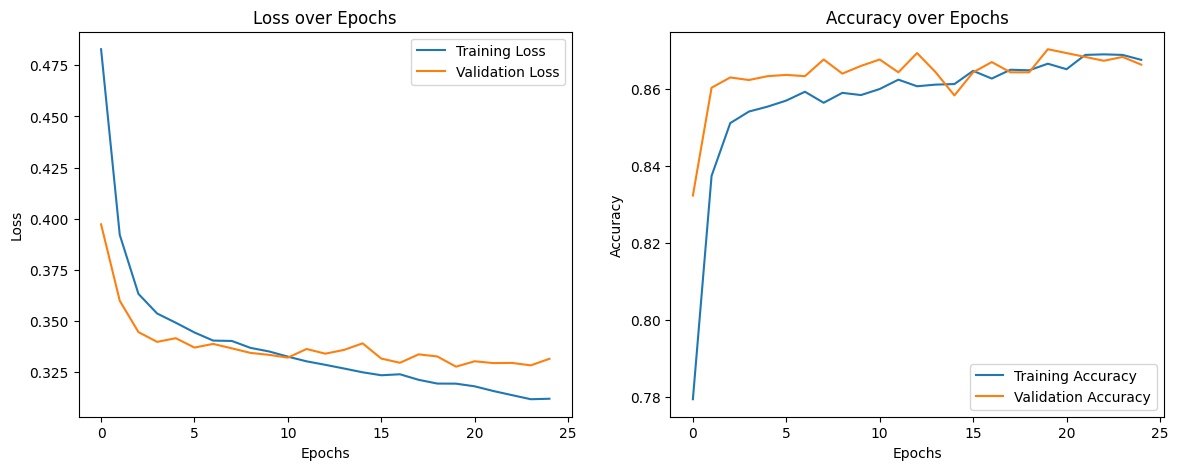

In [38]:
epochs = len(loss)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
## 🔴 CONFUSION MATRIX & CLASSIFICATION REPORT
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

94/94 [==============================] - 0s 680us/step


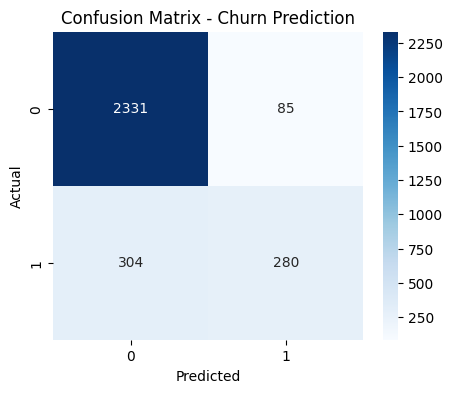

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.77      0.48      0.59       584

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.76      3000
weighted avg       0.86      0.87      0.86      3000



In [41]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Churn Prediction")
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

In [42]:
# Load Tensorboard Extension
%load_ext tensorboard

In [44]:
%tensorboard --logdir logs/fit/20260112-195914/

Reusing TensorBoard on port 6006 (pid 4364), started 0:00:10 ago. (Use '!kill 4364' to kill it.)

DONT USE THIS CODE